# [MICRO-452:][MICRO-452] Project Report



<p><b>Authors:</b> &nbsp;&emsp;&emsp;&emsp;&emsp;&emsp;Stephen Monnet, David Rüegg, Julien Burkhard, Sylvain Jacquart<br>
<b>Supervisors:</b> &nbsp;&emsp;&emsp;&emsp;Prof. Francesco Mondada, Laila El-Hamamsy<br>
<b>Due date:</b>  &nbsp;&nbsp;&nbsp;&emsp;&emsp;&emsp;&emsp;December 12th, 2021</p>
<b>Presentation date:</b> &nbsp;&nbsp;December 16th, 2021</p>

[MICRO-452]: https://moodle.epfl.ch/pluginfile.php/2727652/mod_resource/content/3/Week%209%20-%20Project%20Presentation.pdf

<h1><center> Thyminotaur - εσκαπινγ θε μαζε (Εscaping the maze) </center></h1>
<img src="images/angry_thymio.gif" style="width: 600px;">

<h1>Table of Contents<span class="tocSkip"></span></h1><br>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1.&nbsp;&nbsp;</span>Introduction</a></span></li></ul><ul class="toc-item"><li><a href="#Project-summary-,-hardware-and-choices" data-toc-modified-id="Project-summary-,-hardware-and-choices-2"><span class="toc-item-num">2.&nbsp;&nbsp;</span>Project summary, hardware and choices</a></li></ul><ul class="toc-item"><li><span><a href="#Vision" data-toc-modified-id="Vision-3"><span class="toc-item-num">3.&nbsp;&nbsp;</span>Vision</a></span></li></ul><ul class="toc-item"><li><a href="#Global-navigation" data-toc-modified-id="Global-navigation-4"><span class="toc-item-num">4.&nbsp;&nbsp;</span>Global navigation</a></li></ul><ul class="toc-item"><li><a href="#Local-navigation" data-toc-modified-id="Local-navigation-5"><span class="toc-item-num">5.&nbsp;&nbsp;</span>Local navigation</a></li></ul><ul class="toc-item"><li><a href="#Filtering" data-toc-modified-id="Filtering-6"><span class="toc-item-num">6.&nbsp;&nbsp;</span>Filtering</a></li></ul><ul class="toc-item"><li><a href="#Motion-control" data-toc-modified-id="Motion-control-7"><span class="toc-item-num">7.&nbsp;&nbsp;</span>Motion control</a></li></ul><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8.&nbsp;&nbsp;</span>Conclusion</a></span></li></ul><ul class="toc-item"><li><a href="#Main" data-toc-modified-id="Main-9"><span class="toc-item-num">9.&nbsp;&nbsp;</span>Main</a></ul> 

# I. Introduction
<a class="anchor" id="Introduction"></a>
<p style='text-align: justify;'> 
    This mobile robotics project is inspired by the old legend of <i>Theseus and the Labyrinth</i>. It all started during the SHS course <i>Myths of the ancient Mediterranean Sea</i> with the following question:</p>

**What if the Minotaur, trapped forever in the vast Labyrinth built on Creta island, could find his way out and live his best life under the greek sun?**

The major goal of this project is therefore to help the little Thyminotaur to find his way out of the maze! To help him with his quest for freedom, the 5 following tools are implemented in the project.  

1. **Vision**: Placed above the maze, a camera detects the walls, maze exits and the position (x, y, orientation) of the robot. The optimal path is then computed with the vision information. A calibration is also performed prior to the execution of the program, to guarantee an accurate tracking of the Thymio.


2. **Global Navigation**: With the help of the camera, the global path to the nearest exit of the labyrinth is computed and used as the route to follow for the Thymio. The nearest exit is detected with a common cost-function algorithm.


3. **Local Navigation**: With the help of the 5 front infrared sensors, the Thymio can avoid unexpected obstacles along the way. Different weights are assigned to each proximity sensor to ensure a smooth obstacle avoidance behaviour and a minimum of wall-crossing during these manoeuvres.


4. **Filtering**: An extended Kalman Filter is implemented in this project, as a support to the vision part. Using this filter, we can precisely track the robot in linear speed/position of XX and in angular speed/angle of YY.


5. **Motion Control**: Once the path is computed, the information is transmitted to the Thymio which starts moving.


The main folder of the project can be found following the repository: https://github.com/jbyuki/labyrinth-project

The global decision tree for the project can be summarized in the figure below. Thyminotaur is robust to a camera blinding (thanks to the Kalman filter) but not to kidnapping; after all, nobody is brave enough to dare approach the legendary Thyminotaur..

<img src="images/Decision_tree.PNG" style="width: 600px;">

# II. Project summary, hardware and choices
<a class="anchor" id="Project-summary-,-hardware-and-choices"></a>
### Project summary

<img src="images/GlobalExplenation.PNG" style="width: 600px;">

1. We place the Thymio on a random cell of the labyrinth. The camera detects the *ArUco Marker* on the Thymio, compiling its position and orientation. 


2. The labyrinth is drawn with 2 exits; using the A* algorithm, the Thymio follows the path to the nearest exit of the maze (green path on the figure).


3. During the path following, unexpected obstacles will block the road to our adventurous Thyminotaur. Thanks to his local avoidance abilities (based on his proximity sensors and his single neuron), no unexpected event will stand between him and the exit. He bypasses every obstacle until the maze exit.


4. The Thymio stops at the exit of the Labyrinth, satisfied with his regained freedom.

### Hardware
<p style='text-align: justify;'>
The labyrinth covers a 4x5 cells unit (17cm x 20cm each) and is printed on an A0 white paper (shout-out to the PolyRepro for their fast delivery). To ensure a good camera tracking, the Thymio carries an <i> ArUco Marker</i>, which allows to detect the position and orientation of the robot. The marker is stuck to <i>Lego bricks</i> and mounted directly on top of the Thymio, as you can see in the picture below.</p>

<img src="images/combined_pic_thymio_lab.PNG" style="width: 600px; ">


### Additional choices for this project
1. At first, a solid labyrinth made of wood was considered enclosing the Thymio. After several tries and prototypes, the full paper option (black lines printed on a large white sheet) was selected for its practicality and easiness of implementation with the vision part.

    
2. To mark out the available space of the Thymio (his playground), 4 additional ArUco Markers are placed on each corner of the sheet. The camera placed above the labyrinth is never perfectly aligned with the sheet, both in position and angle; the ArUcodes, combined with extreme-positions calibration, allow a straightforward flattening of the image at the vision initialization.

# III. Vision
<a class="anchor" id="Vision"></a>

In the Thyminotaur project, the whole vision data is provided by a single static camera located over the robot's scope of operation. We use vision during the initialization phase (labyrinth recognition, full-scale calibration, corners detection) and while the robot is moving (Thymio detection). We coded the entire vision part using the Python library <i>Open Source Computer Vision</i> ([opencv][cv2]).

We assigned ArUco Markers to critical variables of the project (the moving Thymio and the 4 corners) to ensure consistency in the code. These markers are a simple yet efficient way to convert information from a full vision scope to a code of variables and raw data (images on left & center). For corners, it is just a way to fix the operating frame of the robot and flatten the image. On the Thymio, the marker allows to track the position and angle of the Thyminotaur from the starting point in real time.

The labyrinth is made of large, 20mm-width black lines printed of white paper to achieve the best contrast. This simplifies our program in defining the possible paths for the robot (image on right). <font color='red'> Since system vision is a key element in both the global navigation algorithm and for general system motion control, we directly included the vision functions in each class rather than putting them in their own separate class. </font> <br>

<img src="images/vision_3_image.PNG" style="width: 900px;">
    
[cv2]: https://github.com/opencv/opencv

This section shows how the vision works to detect the thymio and the labyrinth. As mentionned before, it uses extensively the ArUco codes to locate the 4 corners of the labyrinth and the Thymio. The ArUco utilities are not available in the standard OpenCV distribution. `opencv-contrib-python` needs to be installed in order to run the code.

Various constants are set such as which ArUco dictionary is used, the dimensions of the transformed image, the ArUco ids of the corner in the correct order, the threshold by which a component is considered as a wall. The dimensions of the transformed image are based on the A0 paper ratio so that a square in world space would remain a square in image space.

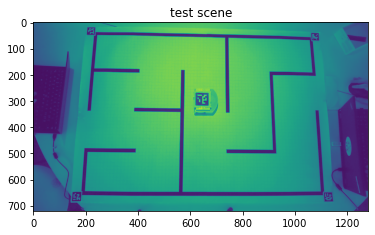

In [2]:
import numpy as np
import cv2 as cv
import cv2.aruco as aruco
import matplotlib.pyplot as plt

# ArUco dictionary
dict_id = aruco.DICT_6X6_50
arucoDict = aruco.Dictionary_get(dict_id)
arucoParams = cv.aruco.DetectorParameters_create()

## A0 paper ratio
res_w = 720
res_h = 1020

# Corners dictionary
corner_ids = {
    10: 3,
    8: 2,
    15: 0,
    6: 1,
}

# Vision thresholds
WALL_THRESHOLD = 5000

# Load test image
img = cv.imread("images/example_scene.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(img_gray)
plt.title('test scene')
plt.show()

On the image, the visible objects are:
* The labyrinth with the printed walls on a A0 paper
* The ArUcos on the 4 corners which allow to flatten the perspective
* The Thymio with an ArUco on top of it

Running the ArUco utilities, it's possible to confirm that they are detected by opencv. 
The size can be suprisingly small on the image and they are still detected. On contrary,
if even a small part of the code is ocluded, it's not detected anymore.

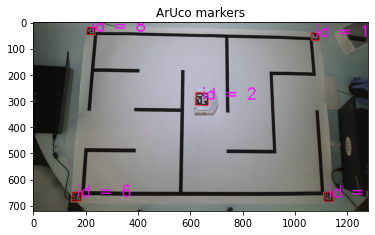

In [3]:
img_detected = img.copy()

(corners, ids, rejected) = cv.aruco.detectMarkers(img_detected, arucoDict,
    parameters=arucoParams)

for i, id in enumerate(ids):
    c = np.int32(corners[i][0])
    center = (c[0]+c[1]+c[2]+c[3])//4
    for i in range(4):
        cv.line(img_detected, tuple(c[i]), tuple(c[(i+1)%4]), (255, 0, 0), 2)
    cv.putText(img_detected, f'id = {id[0]}', tuple(center), cv.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 255), 4)
    
plt.imshow(img_detected)
plt.title('ArUco markers')
plt.show()

Now having the knowledge of the 4 corners, it's possible to compute
a perspective transform matrix which will flatten the labyrinth. This process
is done once at the beginning because the camera should in principle not
move during the program run.

The `vision_utils` has a function to detect all ArUco on the image. This should be
done once per frame so that the detected positions is passed to other functions
for use in different recognition processes.

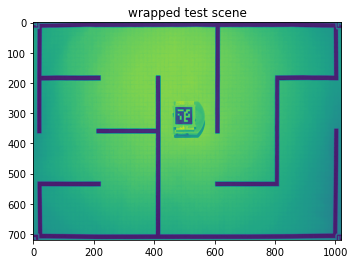

In [4]:
# Detect all AruCo in image
def detect_aruco(img):
  detected = cv.aruco.detectMarkers(img, arucoDict,
    parameters=arucoParams)
  return detected 

# Get position of ArUco marker
def get_pos_aruco(detected, search_id):
  (corners, ids, rejected) = detected

  if ids is not None:
    for i, id in enumerate(ids):
      c = corners[i][0]
      if id[0] == search_id:
        center = (c[0]+c[1]+c[2]+c[3])/4
        return (center, c)
  return (None, None)

# Get perspective transform from img from ArUco corners
# Returns none if corners are not detected
def get_labyrinth_perspective(img):
  detected = detect_aruco(img)

  cs = [None]*4
  for (id, idx) in corner_ids.items():
    (center, _) = get_pos_aruco(detected, id)
    if center is not None:
      cs[idx] = center
    else:
      return None

  # Do perspective correction
  pts1 = np.array([cs[0], cs[1], cs[3], cs[2]])
  pts2 = np.float32([[res_h,res_w], [0, res_w], [res_h, 0], [0, 0]])

  return cv.getPerspectiveTransform(pts1,pts2)

# Given perspective transform, crops the original image
def crop_labyrinth(img, M):
    return cv.warpPerspective(img,M,(res_h,res_w))

# M is the perspective transformation matrix
M = get_labyrinth_perspective(img_gray)
transformed = crop_labyrinth(img_gray, M)

plt.imshow(transformed)
plt.title('wrapped test scene')
plt.show()

This allowed to retrieve an image as if the camera is placed above. As explained later, this is still not good because there are some apparent distortion effect. The ArUco on the Thymio has a slight offset depending on the position because of perspective. But the image of the labyrinth is now flat.

The next step is to extract the walls which are then passed to the navigation module. First, an adaptive threshold is applied. The kernel size should be large enough so that the walls are recognized in one piece. But before that, because the ArUco could be detected as walls and the positions are known, they are removed from the image. Then an adaptive threshold is applied.

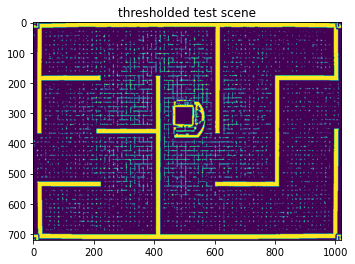

In [5]:
def erase_aruco(img, detected):
    (corners, _, _) = detected

    if corners is not None:
        for i in range(len(corners)):
            c = np.int32(corners[i][0])

            # Remove AruCo
            cv.drawContours(img, [c], 0, 255, -1)

thresholded = transformed.copy()
detected = detect_aruco(thresholded)
erase_aruco(thresholded, detected)

# Threshold
thresholded = cv.adaptiveThreshold(thresholded,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,31,2)

plt.imshow(thresholded)
plt.title('thresholded test scene')
plt.show()

To remove, the remaining noise, a morphological opening is applied. The kernel
size is kept small to avoid damaging the detected walls. 

The noise produced the Thymio's shadow is still apparent afterwards. It was
decided to use opencv's `connectedComponentsWithStats` to get the image components
and remove any components which has an area below a threshold. 
This image processing algorithm works usually well in normal lighting conditions.

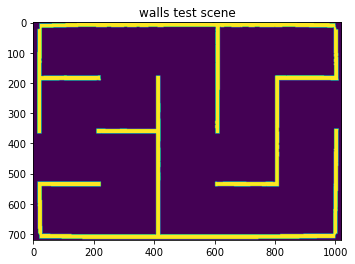

In [6]:
walls = thresholded.copy()

# Remove noise
kernel = np.ones((5,5),np.uint8)
walls = cv.morphologyEx(walls, cv.MORPH_OPEN, kernel)

# Detect connected components
num_labels, labels, stats, _ = cv.connectedComponentsWithStats(walls, 8, cv.CV_32S)

# Pick wall components
result = np.zeros_like(walls)
for i in range(1, num_labels):
    if stats[i, cv.CC_STAT_AREA] > WALL_THRESHOLD:
        result[labels == i] = 255


plt.imshow(result)
plt.title('walls test scene')
plt.show()

The last operation is to dilate the walls. This simple trick allows the navigation
module to simply find a path, and not worry about the Thymio being too close to the
walls. The walls are first slightly dilated, this connects any walls which could
have been disconnected because of noise.

The walls are then dilated until the number of connected changes. The labyrinth is
actually two connected components, if it's too dilated, it becomes one connected component,
and the algorithm stops. 

It accepts a `wall_margin` argument. This is the margin for dilation, if the space
between is too small, it could become impossible to pass when the image is resized
to a small image for navigation. Thus a large enough margin is kept.

At the end, the walls are also dilated independently horizontally and vertically.
The image could be distorded and need more dilation in one direction.

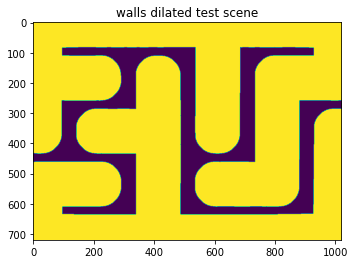

In [7]:
def dilate_walls_max(img, init_wall_size, wall_inc, wall_margin):
    wall_size = init_wall_size

    num_components_previous, _, _, _ = cv.connectedComponentsWithStats(img, 8, cv.CV_32S)

    # Check that the dilate at first doesn't affect the connected components
    # count
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(wall_size[0]+wall_margin[0], wall_size[1]+wall_margin[1]))
    dilated = cv.dilate(img,kernel,iterations = 1)

    num_labels, _, _, _ = cv.connectedComponentsWithStats(dilated, 8, cv.CV_32S)

    if num_labels < num_components_previous:
        return img

    # Dilate by increment and check that the number of 
    # connected components stay the same
    while True:
        wall_size[0] += wall_inc[0]
        wall_size[1] += wall_inc[1]

        kernel =cv.getStructuringElement(cv.MORPH_ELLIPSE,(wall_size[0]+wall_margin[0], wall_size[1]+wall_margin[1]))
        dilated = cv.dilate(img,kernel,iterations = 1)

        num_labels, _, _, _ = cv.connectedComponentsWithStats(dilated, 8, cv.CV_32S)

        if num_components_previous > num_labels:
            wall_size[0] -= wall_inc[0]
            wall_size[1] -= wall_inc[1]

            kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,wall_size)
            return cv.dilate(img,kernel,iterations = 1)

        num_components_previous = num_labels

final = result.copy()
# Dilate walls first to connect disconnected walls
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(70, 70))
final = cv.dilate(final,kernel,iterations = 1)
final = dilate_walls_max(final, [5, 5], [10, 10], [20, 20])

final = dilate_walls_max(final, [5, 5],[10, 0], [20, 20])
final = dilate_walls_max(final, [5, 5], [0, 10], [20, 20])

plt.imshow(final)
plt.title('walls dilated test scene')
plt.show()

This concludes the detection of the labyrinth's walls. The image is then reduced and passed directly to the navigation module. 

It was briefly mentionned before, the Thymio's detected position is distorded due to perspective. This is corrected using a manual offset calibration. The offset is then interpolated when the thymio is on the labyrinth. The following codes will first compute the Thymio's position.

[-3.5620759   9.91029308]


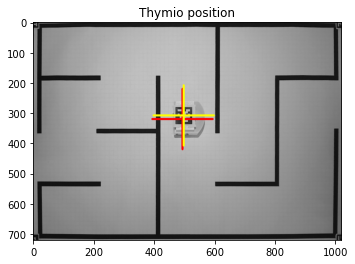

The yellow cross is the ArUco detected position
The red cross is the position with the perspective correction offset


In [8]:
import pickle
from scipy.interpolate import LinearNDInterpolator

# Ids
thymio_id = 2

# Given the ID, gives the position, angle of the Thymio
# assuming an ArUco is put on top of it
def localize_thymio(detected):
    # Detect aruco
    (center, c) = get_pos_aruco(detected, thymio_id)
    
    if center is None:
        return (None, None, None)
    
    # c[0]        TOP LEFT
    # c[1]        BOTTOM RIGHT
    # c[2]        BOTTOM LEFT
    # c[3]        TOP LEFT
    # Compute orientation
    top_middle = (c[0]+c[3])/2
    dir = top_middle - center
    angle = np.arctan2(dir[0], dir[1])
    
    return (c, center, angle)

def load_z_offset_data(path):
    global offset_interp

    f = open(path, "rb")
    saved = pickle.load(f)

    (thymio_pos, offset_pos) = saved

    offset_interp = LinearNDInterpolator(thymio_pos, offset_pos, 0)

# Once load_z_offset_data() has been loaded
# this function can be called to get an interpolated offset
# to estimate the Thymio position on the group
def get_z_offset(center):
    if offset_interp is not None:
        return offset_interp(center[0], center[1])
    else:
        print("No interpolator for z offset (please use load_z_offset_data() first)")
        return [0, 0]
    
def transform_perspective_point(M, p):
  px = (M[0,0]*p[0] + M[0,1]*p[1] + M[0,2]) / ((M[2,0]*p[0] + M[2,1]*p[1] + M[2,2]))
  py = (M[1,0]*p[0] + M[1,1]*p[1] + M[1,2]) / ((M[2,0]*p[0] + M[2,1]*p[1] + M[2,2]))
  return (px, py)

load_z_offset_data("data/z_offset.bin")

thymio_loc = cv.cvtColor(transformed, cv.COLOR_GRAY2BGR)
detected = detect_aruco(img)
(_, center, _) = localize_thymio(detected)

offset = get_z_offset(center)
print(offset)
offset_center = center + np.array(offset)

# Important! the point needs to be transformed with
# the perspective matrix.
offset_center = transform_perspective_point(M, offset_center)

cv.drawMarker(thymio_loc, np.int32(offset_center), (255, 0, 0), markerSize=200, thickness=5)

# Get  center position on AruCo
detected = detect_aruco(transformed)
(_, center, _) = localize_thymio(detected)

cv.drawMarker(thymio_loc, np.int32(center), (255, 255, 0), markerSize=200, thickness=5)

plt.imshow(thymio_loc)
plt.title('Thymio position')
plt.show()

print("The yellow cross is the ArUco detected position")
print("The red cross is the position with the perspective correction offset")

The offset calibration data is done manually before using the script `vision/calibrate_offset.py`.
The general principle for the vision's algorithms was explained. For more details, please refer to `vision/vision_utils.py`.

# IV. Global navigation
<a class="anchor" id="Global-navigation"></a>
As the Thyminotaur is lazy and wants to reach the closest exit to the Greek beach, the global navigation provides him with the shortest path to follow. Furthermore Thyminotaur is rapidly sick when travelling, even more when turning in circles. Therefore, the global path is penalized for computing a route turning too much.

The global navigation implementation is based on the <i>motion cost approach</i>, where the cost corresponds to the distance from the origin to the next point. Besides the nominal cost, when turning to follow another trajectory instead of going straight, a fixed cost is added to the basic move.

We use the A* algorithm to compute the path. Since our labyrinth map is made of squared cells and right-angled corner, this algorithm suits perfectly for this application. Extending it with a heuristic cost function can be an efficient way to optimize the search; however, we will see later on the complication caused by multiple exits.

Finally, the global path given to the motion control module comprises a succession of absolute points on the XY Cartesian plane. This is the most convenient way to navigate our Thymio inside the rectangle, straight design maze. You can see an example of the camera / live implementation below.

<img src="images/Path_planning.PNG" style="width: 900px;">

## Task summary

The algorithm to compute the optimal path for the Thyminotaur can be described with the 7 following steps:

1. Given the labyrinth map from the vision module, define the starting and the exits(s) positions.
2. Resize the map for a faster computation.
3. Create all possible nodes.
4. Define the heuristic cost for each node.
5. Find the optimal path, if such a path exists.
6. Reconstruct the path with only the necessary nodes (when the direction change).
7. Scale up the path to its original size.

Within the following paragraphs, we will tackle the implementation of the A* algorithm, with the heuristic cost function and motion cost function. You can find more informations on the gloabl navigation module in the file `navigation\nav_global_utils.py`.

### A* algorithm

Our algorithm is based on the <i>laboratory n°5 - path planning</i> exercise, with slight changes to the two cost functions. 

Starting from the basis, the A* algorithm runs on the following cost function:

$$ f(n) = g(n) + h(n) $$
Where: 
- $g(n)$ is the motion cost.
- $h(n)$ is the heuristic cost.
- $f(n)$ is the total value of the node.

The algorithm will then search the goal by exploring the neighborhood of the lowest node value $f(n)$. 

#### Heuristic cost function
One heuristic cost function could attribute a cost to each node based on the flight distance (ignoring the walls) between the goal and the node. With this approach, the algorithm will be optimized to search the goal in direction of it, and therefore not searching in every direction. However, when we have multiple goals, how does the computation works? With a sum of each heuristic cost from each goal? This is clearly not a good option; with two goals close to each other, a strong penalization is computed for a third goal far away, and it will not be discovered even if this third goal is close to the starting point.


We overcome this difficulty by turning the Thymio over the aim. Instead of searching from the starting point to the goals, we search now from the multiples goals towards the start. However, this is not as optimal as the unique goal case; if the two goals are far from each other, the entire map is discovered in the process.

#### Motion cost function
Regarding the motion cost, we add a feature which penalizes the changes of direction. We do this for two reasons:
1. To avoid a moving in "stair-step", so the robot doesn't turn for every step.
2. To improve odometry. Since the robot is more subject to prediction errors in position while turning, we can minimize these erros by moving straight.


We show the `motion_cost` function below. It takes the previous, current and next position as parameters, in order to compute the last predicted movement. The <i>cost parameter</i> is a tuple of three values; the first and second values are normal cost in term of distance, while the third one is specifically the cost for the change of direction. If the change of direction cost is null, there are obviously no changes to consider. However, as we increase this cost, the path to the goal becomes longer but with fewer turns. 

In [1]:
def motion_cost(previous, current, next, defined_cost):
    straight_cost = defined_cost[0]
    diag_cost = defined_cost[1]
    turn_cost = defined_cost[2]

    prev_motion = np.asarray(current) - np.asarray(previous)
    current_motion = np.asarray(next) - np.asarray(current)

    if current_motion.all():
        cost = diag_cost
    else:
        cost = straight_cost
    # add cost for turning
    if not(np.array_equal(prev_motion, current_motion)) and not(np.array_equal(prev_motion, [0,0])):
        cost = cost + turn_cost
    return cost

The figures hereunder show some examples of a computed path with three different additional cost for turning: 0 (A), 1 (B) and 5 (C). As we can see, when we do not add penalities for turning, the motion is very staircase like. When the cost increase just a little, the path is only made of long straight lines. Finally, when the cost is even bigger, the path change to a longer one, but with fewer turns. 

<img src="images/cost_merged.png" style="width: 400px;">


# V. Local Navigation
<a class="anchor" id="Local-navigation"></a>
The local navigation runs continually while the Thymio is moving. This section is only implemented to avoid unexpected obstacles along the way, not to reorientate the Thymio after such an avoidance. Therefore, both motors are controlled by the `obstacle_avoidance_speed` routine below, over the global navigation algorithm. 

This function is straightforward. It comprises different weights for each of the 5 IR proximity sensors on Thymio's front. These weights give stronger importance to internal sensors over the exterior ones; this is because the Thymio needs to turn more when an obstacle is in front of him than on the side. Using a variable threshold (which can be tuned to match environment conditions), the Thymio can detect if an unexpected obstacle stands on his way to the exit:
- When no obstacle is in sight, the robot is monitored by the global path navigation and goal tracking algorithm.
- When something's on the way, `diffDelta` increases the speed of the motor close to the obstacle side; the closer the obstacle, the faster the motor.


<img src="images/gif_thymio_avoidance.gif" style="width: 400px;">

In [11]:
def obstacle_avoidance_speed(prox):
    obstThr = 1000
    obstacleGain = 0.05
    speed0 = 400
    obstacle_detected = False
  
    for i in range(1, 4, 1):
        if(prox[i] > obstThr):
            obstacle_detected = True

    if not(obstacle_detected) :
        return 0, 0

    elif obstacle_detected :
        diffDelta = 0.5*prox[0] + 0.75*prox[1] - 1*prox[2] -0.75*prox[3] - 0.5*prox[4]
        motor_L = obstacleGain * diffDelta 
        motor_R = - obstacleGain * diffDelta
        return motor_L, motor_R

# VI. Filtering
<a class="anchor" id="Filtering"></a>
We choose to tackle the filtering part of this project by implementing an extended Kalman filter. This additional function is very useful when the signal between the camera and ArUcode one the Thymio is lost. As the global path stays on the computer, the Thymio has to wait for a signal every time it reaches a point on the path. Because of the poor light conditions, the ArUcode may be detected periodically ("blinking" on our screen), leading to a jerking behaviour. The extended Kalman filter can solve this issue.

The developed Kalman class can be found int the file `filter\kalman.py` and will be explained in this section. The Kalman filter  algorithm can be summarized in few steps (source: https://en.wikipedia.org/wiki/Extended_Kalman_filter):
1. Prediction:
    1. Predicted state estimate 
    2. Predicted covariance estimate
2. Update:
    1. Innovation or measurement residual
    2. Innovation (or residual) covariance
    3. Near-optimal Kalman gain
    4. Updated state estimate
    5. Updated covariance estimate 
    
All these steps can be computed using the Kalman class function `kalmanEKF.filter(dt, Zs, Zc)` which takes as parameters the time between two calls, the measurement matrices from the speed sensors ($Z_s$) and the camera ($Z_c$). We will see in the following subsections the implementation of the prediction and update steps, as well as the initializazion step.

In [12]:
def filter(self, dt, Zs, Zc = None):
    Zs = np.asarray(Zs).reshape((NB_SPEED_STATES,1))
    if Zc is not None:
        Zc = np.asarray(Zc).reshape((NB_CAM_STATES, 1))
        if Zc[IDX_THETA] < 0: Zc[IDX_THETA] += 2*np.pi
    self.dt = dt

    self.predict()
    self.update(Zs, Zc)

## Prediction step
First, the states of the robot had to be chosen. Since our robot is mostly moving at constant speed in a straight line, we chose the following states, without any acceleration states:

$$X = 
\begin{bmatrix}
p_x\\
p_y\\
\theta\\
v\\
\omega
\end{bmatrix}
$$
Where:
- $p_x$, $p_y$ is the cartesian position in $[pxl]$.
- $\theta$ is the orientation in $[rad]$.
- $v$ is the magnitude speed in $[pxl/s]$.
- $\omega$ is the angular speed $[rad/s]$.

Because the motion control works in pixels and radian, we chose to keep these units for the states. 

For the model, given that the Thymio has a differential drive kinematics, the motion of the robot can be resumed to rotating around the instantaneous center of curvature (source: http://www.cs.columbia.edu/~allen/F17/NOTES/icckinematics.pdf). Therefore the transition functions used to predict future states are:

$$\label{eq.px}
p_{x_{k+1}} = p_x + \frac{v}{\omega}(sin(\theta+\omega dt)-sin(\theta))
$$
$$\label{eq.py}
p_{y_{k+1}} = p_y - \frac{v}{\omega}(cos(\theta+\omega dt)-cos(\theta))
$$
$$
\theta_{k+1} = \theta +\omega dt
$$
$$
v_{k+1} = v
$$
$$
\omega_{k+1} = \omega
$$

Through the Kalman class, we can executed the prediction calling the function `kalmanEKF.predictX()`, where we added a a condition to avoid dividing by zero when the robot is going straight:

In [13]:
def predict_X(self):
    # Prediction of the states, model approximation: v and w are constant
    x = self.X[IDX_PX]
    y = self.X[IDX_PY]
    theta = self.X[IDX_THETA]
    v = self.X[IDX_V]
    w = self.X[IDX_W]
    dt = self.dt

    if np.abs(w)<=ALMOST_ZERO: # Driving straight, theta is constant
        self.X[IDX_PX] = x + v * np.cos(theta) * dt
        self.X[IDX_PY] = y + v * np.sin(theta) * dt
        self.X[IDX_W] = ALMOST_ZERO
    else: # otherwise
        self.X[IDX_PX] = x + (v/w) * (np.sin(theta + w*dt) - np.sin(theta))
        self.X[IDX_PY] = y - (v/w) * (np.cos(theta + w*dt) - np.cos(theta))
        self.X[IDX_THETA] = (theta + w*dt) % (2.0*np.pi)

As we can see on previous equations, the model is non linear and we thus have to use an extended Kalman filter to compute predicted covariance. Therefore we first have to evaluate the jacobian matrix of the transition function $F$, evaluted at the current state. This is done by calling the Kalman class function `kalmanEKF.evaluateF()`:

In [14]:
def evaluate_F(self):
    # Calculation of the Jacobian of our non linear state prediction system f
    x = self.X[IDX_PX]
    y = self.X[IDX_PY]
    theta = self.X[IDX_THETA]
    v = self.X[IDX_V]
    w = self.X[IDX_W]
    dt = self.dt

    f13 = (v/w) * (np.cos(theta + w*dt) - np.cos(theta))
    f14 = (1.0/w) * (np.sin(theta + w*dt) - np.sin(theta))
    f15 = (v*dt/w) * np.cos(theta + w*dt) - (v/w**2) * (np.sin(theta + w*dt) - np.sin(theta))
    f23 = (v/w) * (np.sin(theta + w*dt) - np.sin(theta))
    f24 = (-1.0/w) * (np.cos(theta + w*dt) - np.cos(theta))
    f25 = (v*dt/w) * np.sin(theta + w*dt) + (v/w**2) * (np.cos(theta + w*dt) - np.cos(theta))
    self.F = np.array([[1.0, 0.0, f13, f14, f15],
                       [0.0, 1.0, f23, f24, f25],
                       [0.0, 0.0, 1.0, 0.0, dt],
                       [0.0, 0.0, 0.0, 1.0, 0.0],
                       [0.0, 0.0, 0.0, 0.0, 1.0]], dtype=np.float32)

Finally, we can compute the predicted states and predicted covariance by simply calling the function `kalamanEKF.predict()`, where $Q$ is the process noise which will be explained in the section "Initialization step".

In [15]:
def predict(self):
    self.evaluate_F()
    self.P = self.F @ self.P @ self.F.T + self.Q
    self.predict_X()

## Update step

The update of the estimated states are done by using two sensors. The primary one ($Z_c$) is the camera given us directly the states $p_x$, $p_y$ and $\theta$. The secondary sensors are the one measuring the speed of each wheel ($v_r$, $v_l$) of the Thimyo. From these measurements we can obtain the states variable $v$ and $\omega$ as follow:
$$
v = \frac{v_r + v_l}{2}
$$
$$
\omega = \frac{v_r - v_l}{L}
$$

where:
- L is the distance between the wheels.

With these two sensors, we can define the observation $H$ matrix, to compute the innovation or measurement residual:
$$ H_c \times X_{k+1}=  
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
\end{bmatrix}
\times
\begin{bmatrix}
p_{x_{k+1}}\\
p_{y_{k+1}}\\
\theta_{k+1}\\
v_{k+1}\\
\omega_{k+1}
\end{bmatrix}
$$

$$
H_s \times X_{k+1} = 
\begin{bmatrix}
0 & 0 & 0 & 1 & \frac{L}{2} \\
0 & 0 & 0 & 1 & -\frac{L}{2} \\
\end{bmatrix}
\times
\begin{bmatrix}
p_{x_{k+1}}\\
p_{y_{k+1}}\\
\theta_{k+1}\\
v_{k+1}\\
\omega_{k+1}
\end{bmatrix}
$$

In addition to the $H_s$ matrix, we have to convert the speed state [pxl/s] into Thymio's units. This is done by a conversion factor determined experimentaly: we measured the distance in pixels travelled by the Thymio at defined speed for a defined time.

Since our observation matrices are linear, it is equal to the jacobian matrices and therefore we can directly use them to compute the innovation covariance matrices and optimal gain. Then we can update the predicted states and predicted covariance.

In [16]:
def update(self, Zs, Zc):
    # update with speed measurement
    Y = Zs - self.Hs @ self.X
    S = self.Hs @ self.P @ self.Hs.T + self.Rs
    K = self.P @ self.Hs.T @ np.linalg.inv(S)
    self.X = self.X + K @ Y
    self.P = (np.eye(NB_STATES)- K @ self.Hs) @ self.P

    # update with camera measurement
    if Zc is not None:
        Y = Zc - self.Hc @ self.X
        S = self.Hc @ self.P @ self.Hc.T + self.Rc
        K = self.P @ self.Hc.T @ np.linalg.inv(S)
        self.P = (np.eye(NB_STATES) - K @ self.Hc) @ self.P
        self.X = self.X + K @ Y

## Initialization step

When we instance an object of class `kalmanEKF` it creates the different matrices with their predifined size. In addition, it creates the initial parameters of the initial states, initial covariance states, process noise $Q$, camera measurement noise $R_c$ and speed measurement noise $R_s$. Some helper function are defined at the end of the class to initialize the different matrices.

### Initial states and covariance
As we can not know the starting position and orientation before measuring it with the camera, we set the initial states at zero, with a high covariance:

$$X_0 = 
\begin{bmatrix}
0\\0\\0\\0\\0\\
\end{bmatrix}
$$
$$P_0 =
\begin{bmatrix}
1000&0&0&0&0\\
0&1000&0&0&0\\
0&0&1000&0&0\\
0&0&0&1000&0\\
0&0&0&0&1000\\
\end{bmatrix}
$$

### Process noise $Q$
The model used is simplified and do not take into account many paramaters, which we can correct a little by placing noise on their states. For example, the model is based on constant speed, even though the robot is turning. Therefore the noise on the states $v$ and $\omega$ are quite high. We can make a non exhausitve list of variables making the model less accurate:
- Model with constant speed
- Placement of the ArUcode on the Thymio not centered.
- Friction of the wheels
- Electrical noise on the command
- Dimension of the robot

To simplify the estimation, we assumed that the process noise matrix is diagonal and therefore it has no correlation between the states even though we could have off-diagonal terms. After tuning the parameters, we ended-up the following matrix:

$$Q=
\begin{bmatrix}
10&0&0&0&0\\
0&10&0&0&0\\
0&0&0.3&0&0\\
0&0&0&20&0\\
0&0&0&0&3\\
\end{bmatrix}
$$

### Camera measurement noise $R_c$
We assumed that there are no correlation between the position and the orientation, so the matrix is a diagonal one. Moreover, it should not evolve over time so the matrix is static and defined only once during the initialization To estimate the variance, we measured several times the static robot position and orientation. We then compute the variance of these data, which are:
$$R_c = 
\begin{bmatrix}
\sigma_{p_x}^2 & 0 & 0 \\
0 & \sigma_{p_y} ^2 & 0 \\
0 & 0 & \sigma_{\theta}^2 \\
\end{bmatrix}
=
\begin{bmatrix}
0.40 & 0 & 0 \\
0 & 0.03 & 0 \\
0 & 0 & 0.01 \\
\end{bmatrix}
$$

### Speed measurement noise $R_s$
Again, we assumed that there are no correlation between the right speed and left speed of the wheels, so the matrix is a diagonal one, as well that there is no dependencies over time. To estimate the variance, we measured several times the speed of the wheels while they were given a constant command. We then compute the variance of these data, which are:
$$R_c = 
\begin{bmatrix}
\sigma_{v_r}^2 & 0 \\
0 & \sigma_{v_l} ^2 \\
\end{bmatrix}
=
\begin{bmatrix}
6.32 & 0 \\
0 & 3.89 \\
\end{bmatrix}
$$

## Results
The implemented Kalman filter is benefic to the system. Indeed, when the camera fails to localize the Thymio, the position and orientation is still estimate through the speed sensors and model of the robot. We therefore can correctly move up to two turns and around four cells before stepping on the walls. As soon as the camera is avalaible, the position and orientation are fixed with a more precise estimate.

# VII. Motion Control
<a class="anchor" id="Motion-control"></a>

The motion control aims to provide the correct motors command $v_L$ (left wheel) and $v_R$ (right wheel) to the robot, depending on its position ($P_{x_r}$, $P_{y_r}$, $\alpha_r$) and the path to follow computed previously. The control approach is direct, because the trajectories can only be composed of straight lines in the actual maze. Therefore, the robot can accurately follow the path simply by moving to the intersection points of the straight lines generated by the A* algorithm.
The motors command can be decomposed into three terms :

$$\vec v_{mot} = \vec v_{orientation} + \vec v_{position} + \vec v_{obstacle} = \begin{bmatrix}
v_L\\
v_R\\
\end{bmatrix}$$

1. **Orientation**: When the next point $P_{k+1}$ where the robot needs to go is known, the robot has to correct its orientation $\alpha_r$. A simple P regulator is used to minimize the error $\alpha_e = \alpha_r - \alpha_c$, where $\alpha_c$ is the commanded orientation of the robot. The following equations show how the angular command is computed and then how is deduced the motor speed (orientation part).

$$\alpha_c = - atan2(\frac{Py_{k+1} - P_{y_r}}{Px_{k+1} - P_{x_r}})$$

$$\vec v_{orientation} =  K_{p_\alpha} \cdot \alpha_e \cdot \begin{bmatrix}
1\\
-1\\
\end{bmatrix}$$


$$-180 \leq \alpha_e \leq 180$$
    
  The $\pm$ sign is used to notify that the robot needs to turn, so the speed of the left and the right wheel need to be in  the opposite directions. The value of $\alpha_e$ is artificially maintained between -180 and +180° to avoid discontinuity effects (see `implementation problematics` sub-chapter below).




In [19]:
def compute_angle(actual_point, point_to_go):
    angle = -180 * math.atan2(point_to_go[1] - actual_point[1], point_to_go[0] - actual_point[0]) / math.pi
    return angle

2. **Position**: Now that the robot has the right orientation, it needs to move forward to reach the point $P_{k+1}$. The motor command for this part is not computed using a classic P control law because it is based on the angular error. The aim is to have a constant speed when the robot is travelling between two points with the right orientation but also to have a linear speed close to zero (for this part) when the orientation is wrong : 

$$\vec v_{position} = K_{p_d} \cdot (180 ~- \mid\alpha_e\mid) \cdot \begin{bmatrix}
1\\
1\\
\end{bmatrix}$$

<img src="images/MotionControl_scheme_net.png" style="width: 600px;">

3. **Obstacle avoidance**: This part also sets a speed command using rules that are already described in its own section.

These three parts are the main ideas of the motion control approach used for this project. The motor speed commands $\vec v_{orientation}$ and $\vec v_{position}$ are computed with the function below. The result of this latter is then summed (in the main script) with the command $\vec v_{obstacle}$ from the obstacle avoidance function.

In [20]:
def compute_motor_speed(angle_error, regulator, is_finished):
    if is_finished:
        motor_L = 0
        motor_R = 0
        return motor_L, motor_R

    elif angle_error < -180 :
        angle_error = 360 + angle_error

    elif angle_error > 180 :
        angle_error = -360 + angle_error
      
    motor_L = (regulator.Kp_dist * (180-abs(angle_error))) + regulator.Kp_angle * angle_error
    motor_R = (regulator.Kp_dist * (180-abs(angle_error))) - regulator.Kp_angle * angle_error

    return motor_L, motor_R

## Implementation problematics

This motion control implementation involved being careful about the following points :
   - **Referential consideration** : Two angles need to be considered for this problem, the orientation of the robot $\alpha_r$ and the angle between the vector $\vec d(t)$ and the $\vec y$ axis, which is used to set the orientation command of the robot. This was more difficult than expected to ensure consistence between these two values in any situation.
   
   
   - **Angular discontinuity** : Because an angle is defined between $0 ~rad$ and $2\pi ~rad$ it creates a huge discontinuity when the robot angle is close to $2\pi ~rad$ and suddenly goes to $0 ~rad$. For example, suppose the robot needs to reach an orientation of $0 ~rad$ (which is the discontinuity location) and has a current orientation of $\pi/6 ~rad$, then the error is $\alpha_e = \pi/6 - 0 = 0 ~rad$. The generated motors command will reduce the error to reach $\alpha_e = 0 ~ rad$ so $\alpha_r = 0 ~rad$. But if the robot goes further (overshoot) then its orientation will jump from approximatively 0 rad to approximatively $2\pi ~rad$. Therefore, the error becomes $\alpha_e = 2\pi - 0 = 2\pi ~rad$ and so the robot will continue to turn on itself. This effect has been avoided by limiting the orientation error $\alpha_e$ between $-\pi$ and $\pi$ (see function compute_motor_speed above). For example, if the computed error is $3\pi/2~rad$ then it is changed to be equal to $-\pi/2~rad$ which is equivalent but induce a correct orientation correction.
    

## Improvement of the motion control

After several trials, we have identified the following problems:
   - **Overshoot after reaching a point** : Because of the command law presented previously, the speed of the robot doesn't decrease when it arrives close to its point to reach ($P_{k+1}$). So in this configuration, there is a trade-off between the speed of the robot between two points and the overshoot. To solve this issue, the control law has been improved by modifying the gains $K_{P_\alpha}$ and $K_{P_d}$ depending if the robot is close to the point to reach or not. If the robot is close (distance <= 20 pixels) to $P_{k+1}$ the gains are $K_{P_d} = 0.5$ and $K_{P_\alpha} = 4$. If the robot stands further (distance > 20 pixels) to $P_{k+1}$ then the gains are $K_{P_d} = 1$ and $K_{P_\alpha} = 1$. In this configuration, the robot can easily turn without overshoot when coming close to $P_{k+1}$, because the weight of the orientation command increase compared to the weight of the position command. It can also move faster when it is far from $P_{k+1}$.


   
   - **Conflict between $\vec v_{position}$ and $\vec v_{orientation}$** : This problem is like the previous one. It first appeared when the robot started its run very close (approximately 10 pixels) to the next point to reach $P_{k+1}$, oriented in the opposite direction of this latter. In this configuration, the robot could not reach the point because the linear speed command was too high in comparison with the rotation command speed. In fact, the robot could only turn around the point. This problem has also been corrected, thanks to the previously shown a modification of the control law, which gives more weight to the orientation command when the robot is close (distance < 20 pixels) to $P_{k+1}$.
    

In [ ]:
def compute_regulator_gain(distance, distance_tot):
    if distance < DISTANCE_TO_CHANGE_GAIN or (distance_tot - distance) < DISTANCE_TO_CHANGE_GAIN:
        Kp_angle = 4
        Kp_dist = 0.5

    elif distance > DISTANCE_TO_CHANGE_GAIN and (distance_tot - distance) > DISTANCE_TO_CHANGE_GAIN:
        Kp_angle = 1
        Kp_dist = 1

    return Kp_angle, Kp_dist

For more details, please refer to `motion/motion_utils.py`.

# VIII . Conclusion
<a class="anchor" id="Conclusion"></a>


# lX . Main
<a class="anchor" id="Main"></a>
If you desire to execute the code from the notebook, the following cells must be run.
1. Instalation of the required packages
2. Cloning the github repository
3. Modifying the path 
4. Running the main script

In [ ]:
#Instal the required packages, p.ex:
# !pip install opencv-python tqdm matplotlib numpy ipywidgets python-dotenv pyserial
# !jupyter nbextension enable --py widgetsnbextension

In [ ]:
!git clone https://github.com/Thyminotaur/labyrinth-project.git

In [ ]:
%cd labyrinth-project

In [ ]:
!python Main.py